In [1]:
import numpy as np
import seaborn as sns
from typing import Tuple
from scipy.stats import mode
from sklearn.metrics import confusion_matrix


csv_path = r"C:\Users\darab\source\repos\BEVADAT\QYZF3M_BEVADAT2022232\GYAK\GYAK05\iris.csv"

Load data and clean, try loading without shuffle

In [2]:
def load_csv(csv_path:str) ->Tuple[np.ndarray,np.ndarray]:
    np.random.seed(42)
    dataset = np.genfromtxt(csv_path,delimiter=',')
    np.random.shuffle(dataset,)
    x,y = dataset[:,:4],dataset[:,-1]
    return x,y

In [3]:
x, y = load_csv(csv_path)
x, y

(array([[ 6.100e+00,  2.800e+00,  4.700e+00,  1.200e+00],
        [ 5.700e+00,  3.800e+00,  1.700e+00,  3.000e-01],
        [ 7.700e+00,  2.600e+00,  6.900e+00,  2.300e+00],
        [ 6.000e+00,  2.900e+00,  4.500e+00,  1.500e+00],
        [ 6.800e+00,  2.800e+00, -1.111e+03,  1.400e+00],
        [ 5.400e+00,  3.400e+00,  1.500e+00,  4.000e-01],
        [ 5.600e+00,  2.900e+00,  3.600e+00,  1.300e+00],
        [ 6.900e+00,  3.100e+00,  5.100e+00,  2.300e+00],
        [ 6.200e+00,  2.200e+00,  4.500e+00,  1.500e+00],
        [ 5.800e+00,  2.700e+00,  3.900e+00,  1.200e+00],
        [ 6.500e+00,  3.200e+00,  5.100e+00,  2.000e+00],
        [ 4.800e+00,  3.000e+00,  1.400e+00,  1.000e-01],
        [ 5.500e+00,  3.500e+00,        nan,  2.000e-01],
        [ 4.900e+00,  3.100e+00,  1.500e+00,  1.000e-01],
        [ 5.100e+00,  1.000e+02,  1.500e+00,  3.000e-01],
        [ 6.300e+00,  3.300e+00,  4.700e+00,  1.600e+00],
        [ 6.500e+00,  3.000e+00,  5.800e+00,  2.200e+00],
        [ 5.60

In [4]:
np.mean(x,axis=0),np.var(x,axis=0)

(array([nan, nan, nan, nan]), array([nan, nan, nan, nan]))

In [5]:
np.nanmean(x,axis=0),np.nanvar(x,axis=0)

(array([ 355.46503497, -280.09189189,    2.95      ,   21.74726027]),
 array([1.73561968e+07, 1.18405444e+07, 1.51049922e+04, 6.11729208e+04]))

In [6]:
x[np.isnan(x)] = 3.5
x.shape
print(x)

[[ 6.100e+00  2.800e+00  4.700e+00  1.200e+00]
 [ 5.700e+00  3.800e+00  1.700e+00  3.000e-01]
 [ 7.700e+00  2.600e+00  6.900e+00  2.300e+00]
 [ 6.000e+00  2.900e+00  4.500e+00  1.500e+00]
 [ 6.800e+00  2.800e+00 -1.111e+03  1.400e+00]
 [ 5.400e+00  3.400e+00  1.500e+00  4.000e-01]
 [ 5.600e+00  2.900e+00  3.600e+00  1.300e+00]
 [ 6.900e+00  3.100e+00  5.100e+00  2.300e+00]
 [ 6.200e+00  2.200e+00  4.500e+00  1.500e+00]
 [ 5.800e+00  2.700e+00  3.900e+00  1.200e+00]
 [ 6.500e+00  3.200e+00  5.100e+00  2.000e+00]
 [ 4.800e+00  3.000e+00  1.400e+00  1.000e-01]
 [ 5.500e+00  3.500e+00  3.500e+00  2.000e-01]
 [ 4.900e+00  3.100e+00  1.500e+00  1.000e-01]
 [ 5.100e+00  1.000e+02  1.500e+00  3.000e-01]
 [ 6.300e+00  3.300e+00  4.700e+00  1.600e+00]
 [ 6.500e+00  3.000e+00  5.800e+00  2.200e+00]
 [ 5.600e+00  2.500e+00  3.900e+00  1.100e+00]
 [ 3.500e+00  2.800e+00  4.500e+00  3.500e+00]
 [ 6.400e+00  3.500e+00  5.600e+00  2.200e+00]
 [ 4.700e+00  3.200e+00  1.600e+00  2.000e-01]
 [ 6.100e+00 

In [7]:
np.mean(x,axis=0),np.var(x,axis=0)

(array([ 339.04      , -276.31066667,    2.95733333,   21.26066667]),
 array([1.65517522e+07, 1.16837285e+07, 1.49035963e+04, 5.95502852e+04]))

In [8]:
(x > 13.0).sum(), (x < 0.0).sum()

(4, 2)

In [9]:
x[np.where(np.logical_or(x > 13.0,x < 0.0))]

array([ -1111.,    100.,   1000.,  50000.,   3000., -42000.])

In [10]:
less_than = x[np.where(x < 0.0)]
higher_than = x[np.where(x > 13.0)]
less_than,higher_than

(array([ -1111., -42000.]), array([  100.,  1000., 50000.,  3000.]))

In [11]:
y = np.delete(y,np.where(x < 0.0)[0],axis=0)
y = np.delete(y,np.where(x > 13.0)[0],axis=0)
x = np.delete(x,np.where(x < 0.0)[0],axis=0)
x = np.delete(x,np.where(x > 13.0)[0],axis=0)
x.shape,y.shape

((144, 4), (144,))

Train test split
try optim

In [12]:
def train_test_split(features:np.ndarray,
                     labels:np.ndarray,
                     test_split_ratio:float) -> None:
        
    test_size = int(len(features) * test_split_ratio)
    train_size = len(features) - test_size
    assert len(features) == test_size + train_size, "Size mismatch!"

    x_train,y_train = features[:train_size,:], labels[:train_size]
    x_test,y_test = features[train_size:train_size+test_size,:], labels[train_size:train_size + test_size]
    return (x_train,y_train,x_test,y_test)

x_train, y_train, x_test, y_test = train_test_split(x, y, 0.7)

Distance

In [24]:
def euclidean(points:np.ndarray,element_of_x:np.ndarray) -> np.ndarray:
    return np.sqrt(np.sum((points - element_of_x)**2,axis=1))

euclidean(x_train, x_test[0])

array([0.64807407, 3.15436206, 2.90344623, 0.6244998 , 3.318132  ,
       1.28840987, 1.18321596, 0.90553851, 1.00995049, 0.9486833 ,
       3.73229152, 1.92613603, 3.60555128, 0.55677644, 1.61554944,
       1.26095202, 3.75099987, 1.53948043, 3.59583092, 0.81240384,
       3.4       , 1.41774469, 2.58650343, 1.2083046 , 1.54272486,
       3.539774  , 4.16653333, 3.48998567, 0.14142136, 4.36463057,
       3.99124041, 0.97467943, 0.31622777, 3.47275107, 3.65513338,
       3.64280112, 1.21243557, 0.75498344, 0.34641016, 3.58608422,
       3.43220046, 1.48996644, 0.79372539, 1.19163753])

Predict func

In [19]:
def predict(x_train:np.ndarray,y_train:np.ndarray,x_test:np.ndarray,k:int) -> np.ndarray:
    labels_pred = []
    for x_test_element in x_test:
        distances = euclidean(x_train,x_test_element)
        distances = np.array(sorted(zip(distances,y_train)))
        label_pred = mode(distances[:k,1],keepdims=False).mode
        labels_pred.append(label_pred)
    return np.array(labels_pred,dtype=np.int32)

pred = predict(x_train, y_train, x_test, 3)
pred.shape, y_train.shape

Traceback (most recent call last):
  File "C:\Users\darab\AppData\Roaming\Python\Python39\site-packages\debugpy\_vendored\pydevd\_pydevd_bundle\pydevd_vars.py", line 624, in change_attr_expression
    value = eval(expression, frame.f_globals, frame.f_locals)
  File "<string>", line 1, in <module>
NameError: name 'array' is not defined


((100,), (44,))

Metrics

In [15]:
def accuracy(y_test:np.ndarray,y_preds:np.ndarray) -> float:
    true_positive = (y_test == y_preds).sum()
    return true_positive / len(y_test) * 100

accuracy(y_test, pred)

94.0

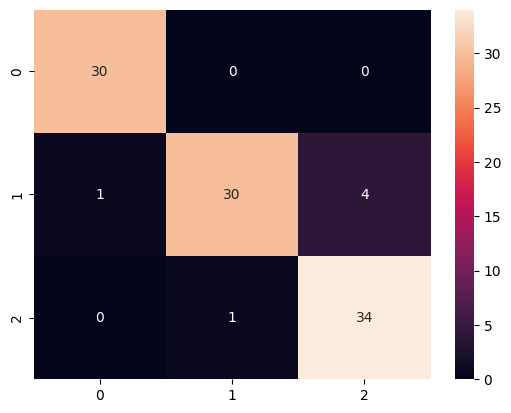

In [16]:
def plot_confusion_matrix(y_test:np.ndarray,y_preds:np.ndarray):
        conf_matrix = confusion_matrix(y_test,y_preds)
        sns.heatmap(conf_matrix,annot=True) 


plot_confusion_matrix(y_test, pred)